# 画像処理の基礎
1. 画像操作をしてみよう
1. フィルタを学んでみよう

### おまじない
- scikit-imageのライブラリをインポートします
    - `from skimage import io` : 主に画像読み込み関連
    - `from skimage import transform` ： 画像操作関連

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from skimage import io
from skimage import transform

### 画像を読み込んでみよう
- io.imread関数を使います

In [3]:
img = io.imread("./cat.jpg")

In [4]:
img

array([[[222, 213, 216],
        [222, 213, 216],
        [222, 213, 216],
        ...,
        [203, 186, 166],
        [203, 186, 166],
        [203, 186, 166]],

       [[222, 213, 216],
        [222, 213, 216],
        [222, 213, 216],
        ...,
        [203, 186, 166],
        [203, 186, 166],
        [203, 186, 166]],

       [[222, 213, 216],
        [222, 213, 216],
        [222, 213, 216],
        ...,
        [203, 186, 166],
        [203, 186, 166],
        [203, 186, 166]],

       ...,

       [[114, 111, 106],
        [115, 112, 107],
        [117, 113, 110],
        ...,
        [ 38,  31,  23],
        [ 38,  31,  23],
        [ 38,  31,  23]],

       [[112, 112, 110],
        [114, 113, 109],
        [117, 113, 110],
        ...,
        [ 39,  32,  24],
        [ 38,  31,  23],
        [ 38,  31,  23]],

       [[112, 112, 110],
        [114, 113, 109],
        [117, 113, 110],
        ...,
        [ 39,  32,  24],
        [ 38,  31,  23],
        [ 38,  31,  23]]

### 画像をnotebook上に表示してみよう
- plt.imshow関数を使います

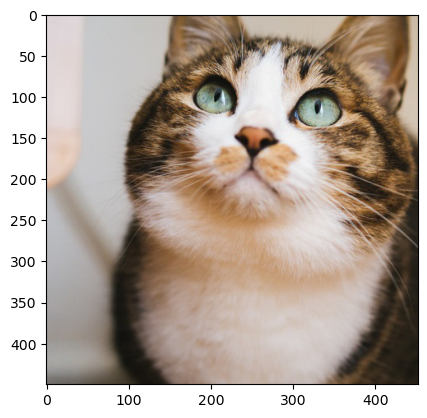

In [5]:
plt.imshow(img)

### 画像の大きさを確かめてみよう

In [6]:
img.shape

(450, 452, 3)

### 一番左上の要素の値（画素値）を取り出そう
- 縦軸の位置=0,横軸の位置=0のピクセルを抽出し、変数img_one_pxに代入しよう

In [7]:
img_one_px = img[0,0,:]
img_one_px

array([222, 213, 216], dtype=uint8)

In [8]:
img_one_px.shape

(3,)

### 取り出した色を表示しよう
- plt.imshow関数でRGB画像を表示する為には(縦軸,横軸,3)という形でなければならない
- 今回は1ピクセルだけなので、縦軸の大きさ=1,横軸の大きさ=1、つまり(1,1,3)に変形すればいい
- 変形にはreshape関数を使い、変形した結果を変数oneに代入し、oneを表示しましょう

In [9]:
one = img_one_px.reshape(1,1,3)
one.shape

(1, 1, 3)

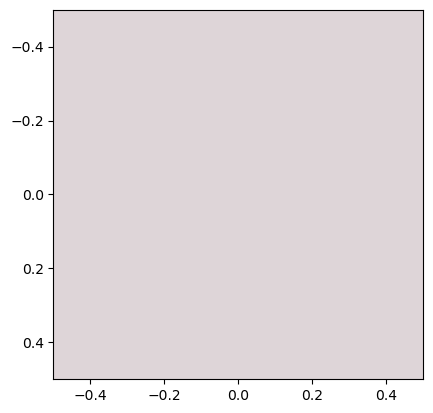

In [10]:
plt.imshow(one)

### RGB情報を取り出してみよう
- 画像全体のR値を取り出して変数rに代入しよう
- 変数rを使い、R値の最大値と最小値も検出してみよう
- 最大値・最小値はそれぞれmax関数とmin関数を使うことで求めることができます
- 更に、変数rの要素全てを0.5倍し、変数r2に代入しよう
    - numpyの配列では、「+,-,*,/」の算術記号を使うことで、配列内要素を一括で計算することができます

In [11]:
r = img[:,:,0]
r

array([[222, 222, 222, ..., 203, 203, 203],
       [222, 222, 222, ..., 203, 203, 203],
       [222, 222, 222, ..., 203, 203, 203],
       ...,
       [114, 115, 117, ...,  38,  38,  38],
       [112, 114, 117, ...,  39,  38,  38],
       [112, 114, 117, ...,  39,  38,  38]], dtype=uint8)

In [12]:
r.max()

249

In [13]:
r.min()

0

In [14]:
r2 = r*0.5

In [15]:
r2

array([[111. , 111. , 111. , ..., 101.5, 101.5, 101.5],
       [111. , 111. , 111. , ..., 101.5, 101.5, 101.5],
       [111. , 111. , 111. , ..., 101.5, 101.5, 101.5],
       ...,
       [ 57. ,  57.5,  58.5, ...,  19. ,  19. ,  19. ],
       [ 56. ,  57. ,  58.5, ...,  19.5,  19. ,  19. ],
       [ 56. ,  57. ,  58.5, ...,  19.5,  19. ,  19. ]])

### 画像を切り出してみよう
- 具体的には縦軸は100～300まで、横軸は200～400までを取り出し、結果を変数img2に代入しよう
- その後、img2をimshow関数を使って表示しよう

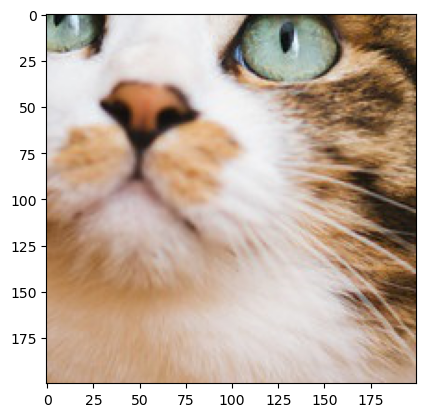

In [16]:
img2 = img[100:300,200:400,:]
plt.imshow(img2)

### 二つの画像を並べて表示してみよう
- 複数の画像を一片に表示する時にはplt.subplot関数を使い、下記のように記述します
- `plt.subplot(縦列,横列,index)`

Text(0.5, 0.5, '3')

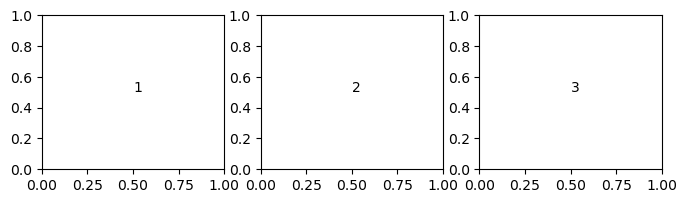

In [17]:
# サイズの指定
plt.figure(figsize=(8,2))

# 1行3列の1番目
plt.subplot(1,3,1)
plt.text(0.5,0.5,"1")

# 1行3列の2番目
plt.subplot(1,3,2)
plt.text(0.5,0.5,"2")

# 1行3列の3番目
plt.subplot(1,3,3)
plt.text(0.5,0.5,"3")

- plt.subplot関数を使って、imgとimg2を1行2列で２つ並べて表示してみよう

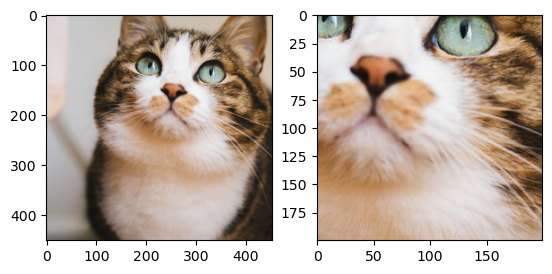

In [18]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img2)

### 画像から100×100の画像をランダムな場所で切り出そう
- 乱数はnp.random.randint関数で取得することができます
    - `np.random.randint(a, b)`
    - aの値以上、bの値未満のランダムな数を取得できる
- seedと呼ばれる値を固定化すると、決まったパターンで乱数を取得することができます

In [19]:
np.random.seed = 8

In [20]:
np.random.randint(0,10)

2

- 画像の縦軸100、横軸100を切り出すことになります
- 考え方としては下記のようになります
    1. 軸の長さを取得する
    1. 0以上（軸の長さ-100+1）未満までの乱数Aを取得する
        - 例えば軸の長さが400だった場合、0~300までの値をランダムに取得する
            - コードでは`np.random.randint(0,301)`
            - indexは0から始まるので、注意
    1. Aの値からA+100までを切り出せば、ちょうど大きさが100となる
        - 乱数では0~300までをランダムに取得したので、A=0だったら0~99の区間、A=300だったら300~399の区間が取得できる

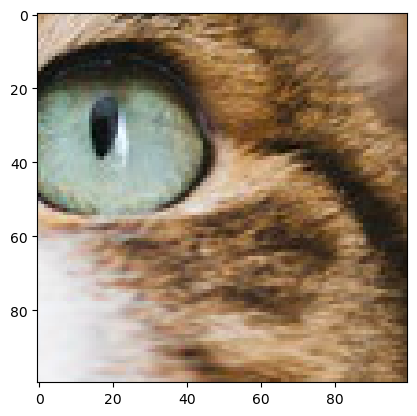

In [21]:
img_h = img.shape[0]
h = np.random.randint(0,img_h-100+1)
img_w = img.shape[1]
w = np.random.randint(0,img_w-100+1)
img_ = img[h:h+100,w:w+100,:]
plt.imshow(img_)

In [22]:
img_.shape

(100, 100, 3)

### 画像から200×200の画像をランダムな場所で6枚切り出し、2行3列で並べて表示しよう
- 全体のサイズを`plt.figure()`を使って、`figsize=(8,5)`にしましょう
- 出来る人はfor文を使った書き方も考えてみましょう

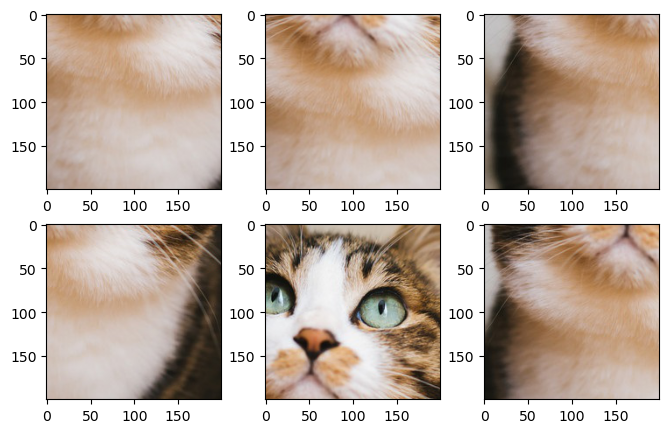

In [23]:
img_h = img.shape[0]
img_w = img.shape[1]

plt.figure(figsize=(8,5))

plt.subplot(2,3,1)
h = np.random.randint(0,img_h-200+1)
w = np.random.randint(0,img_w-200+1)
tmp_img = img[h:h+200,w:w+200,:]
plt.imshow(tmp_img)

plt.subplot(2,3,2)
h = np.random.randint(0,img_h-200+1)
w = np.random.randint(0,img_w-200+1)
tmp_img = img[h:h+200,w:w+200,:]
plt.imshow(tmp_img)

plt.subplot(2,3,3)
h = np.random.randint(0,img_h-200+1)
w = np.random.randint(0,img_w-200+1)
tmp_img = img[h:h+200,w:w+200,:]
plt.imshow(tmp_img)

plt.subplot(2,3,4)
h = np.random.randint(0,img_h-200+1)
w = np.random.randint(0,img_w-200+1)
tmp_img = img[h:h+200,w:w+200,:]
plt.imshow(tmp_img)

plt.subplot(2,3,5)
h = np.random.randint(0,img_h-200+1)
w = np.random.randint(0,img_w-200+1)
tmp_img = img[h:h+200,w:w+200,:]
plt.imshow(tmp_img)

plt.subplot(2,3,6)
h = np.random.randint(0,img_h-200+1)
w = np.random.randint(0,img_w-200+1)
tmp_img = img[h:h+200,w:w+200,:]
plt.imshow(tmp_img)

- for文を使う場合

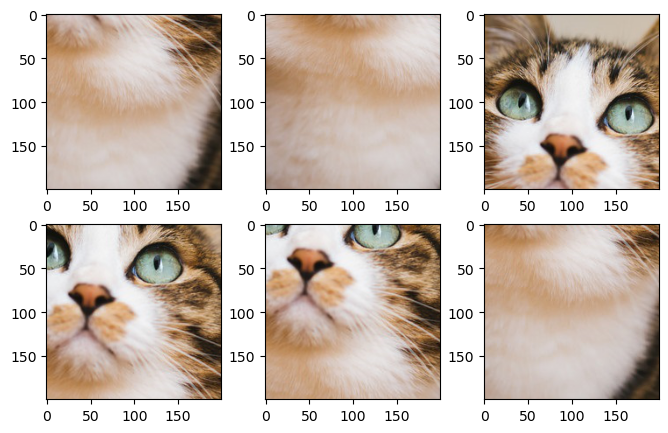

In [24]:
img_h = img.shape[0]
img_w = img.shape[1]

plt.figure(figsize=(8,5))

for i in range(6):
    h = np.random.randint(0,img_h-200+1)
    w = np.random.randint(0,img_w-200+1)
    tmp_img = img[h:h+200,w:w+200,:]
    
    plt.subplot(2,3,i+1)
    plt.imshow(tmp_img)

### 配列を反転してみよう
- 画像データは配列データなので、配列の値を逆転することで、反転を実現することができます
- 反転の実験の為、`np.array([1,2,3,4,5])`という配列を作成し、変数tmpに代入をしましょう

In [25]:
tmp = np.array([1,2,3,4,5])
tmp

array([1, 2, 3, 4, 5])

- 配列の反転は`[::-1]`と記述することで実現できます

In [26]:
tmp[::-1]

array([5, 4, 3, 2, 1])

### 左右反転をしてみよう
- 変数imgの横軸方向を反転することで、左右反転を行うことができます

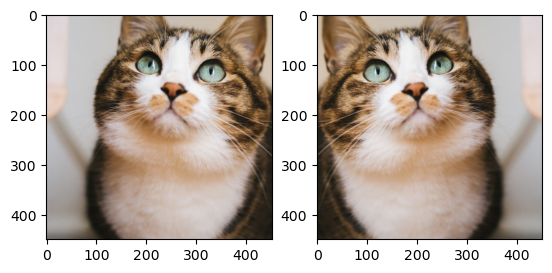

In [27]:
img3 = img[:,::-1,:]
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img3)

### 画像をリサイズしてみよう
- リサイズをする際には、transform.resize関数を利用します
- 具体的には`trainsform.resize(img,output_shape(縦長さ,横長さ))`と記述します

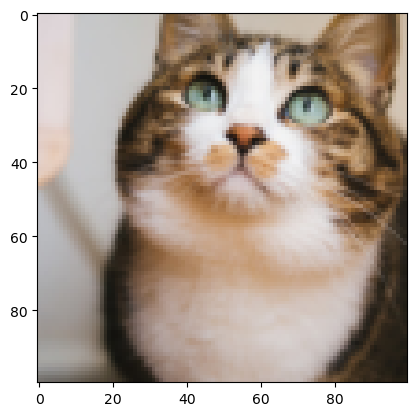

In [28]:
img4 = transform.resize(img,output_shape=(100,100))
plt.imshow(img4)

### 画像を回転してみよう
- 回転をする際には、transform.rotate関数を利用します
- 具体的には`transform.rotate(img,angle=角度)`と記述します

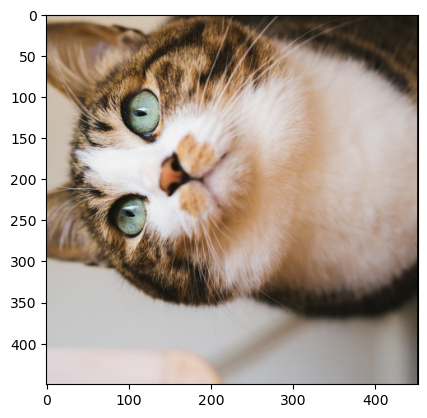

In [29]:
img5 = transform.rotate(img,angle=90)
plt.imshow(img5)

### 画像を平行移動してみよう
- 平行移動をする際には、transform.AffineTransform関数を使います
- 具体的には`transform.AffineTransform(translation=(左方向に動かす大きさ,上方向に動かす大きさ))`と記述します

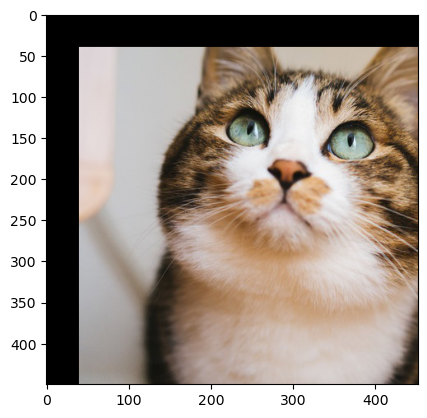

In [30]:
rot = transform.AffineTransform(translation=(-40,-40))
img6 = transform.warp(img,rot)
plt.imshow(img6)

## 演習
1. 画像「dog.png」を読み込み、変数img2に代入しよう
1. 変数img2の大きさを確認しよう
1. 変数img2を横軸は100~500、縦軸は200~600で切り出しをして、変数img3に代入しよう
1. 変数img3をnotebook上に表示しよう
1. 変数img3のG値の最大値と最小値を求めよう
1. 変数img3のR成分を30%, G成分を60%, B成分を10%を取り出し、それらの配列を足し合わせ（グレースケール化）、合成結果を変数img4に代入しよう
1. 変数img4をnotebook上に表示しよう
    - グレースケール画像を表示する時は、引数に`cmap="gray"`を追記します
1. 変数img4の画素値の最大値が1, 最小値が0となるように正規化し、変数img5に代入しよう
1. 変数img3を上下反転させ変数6に代入しよう。更に元の画像が上、反転画像が下となるように、縦に並べて表示しよう
1. 変数img3から300×300の画像をランダムな場所で切り出し、ランダムに回転させた画像を8枚作り、2行4列で表示しよう
    - 画像の大きさは`figsize=(12,5)`としましょう

In [31]:
img2 = io.imread("./dog.jpg")
# plt.imshow(img2)

In [32]:
img2.shape

(533, 800, 3)

In [33]:
img3 = img2[100:700,100:600,:]

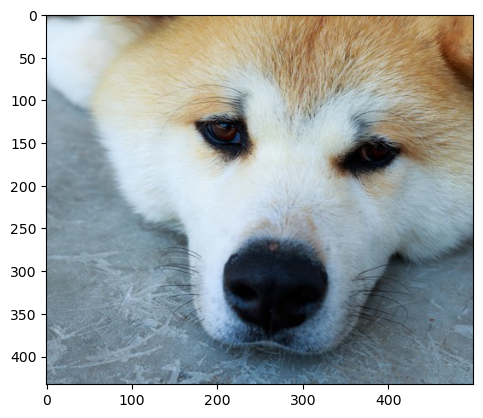

In [34]:
plt.imshow(img3)

In [35]:
g = img2[:,:,1]
g.max(), g.min()

(243, 0)

In [36]:
r = img2[:,:,0]
g = img2[:,:,1]
b = img2[:,:,2]
img4 = (r*0.3 + g*0.6 + b*0.1)

(533, 800)


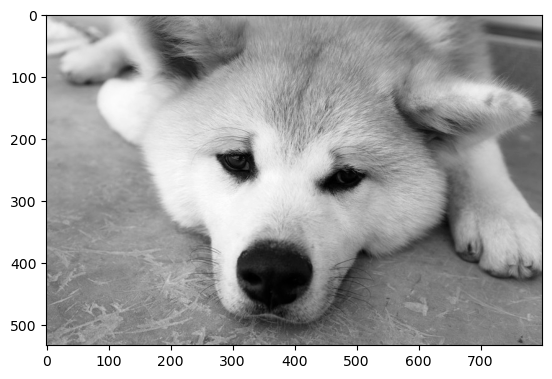

In [37]:
print(img4.shape)
plt.imshow(img4, cmap="gray")

In [38]:
img5 = (img4 - np.min(img4)) / (np.max(img4) - np.min(img4))
print(img5)

[[0.75219024 0.75636212 0.76303713 ... 0.73508552 0.73925741 0.73925741]
 [0.75886525 0.76303713 0.76720901 ... 0.73091364 0.73508552 0.73508552]
 [0.77138089 0.77138089 0.77138089 ... 0.72674176 0.73091364 0.73091364]
 ...
 [0.56487276 0.52315394 0.50396329 ... 0.5035461  0.51481018 0.53817272]
 [0.56195244 0.5773884  0.59574468 ... 0.49937422 0.51188986 0.53566959]
 [0.59532749 0.62453066 0.62494785 ... 0.50062578 0.5035461  0.52857739]]


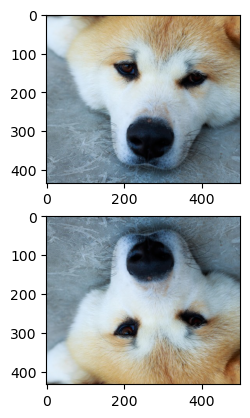

In [39]:
img6 = img3[::-1,:,:]
fig, ax = plt.subplots(2,1)
ax[0].imshow(img3)
ax[1].imshow(img6)

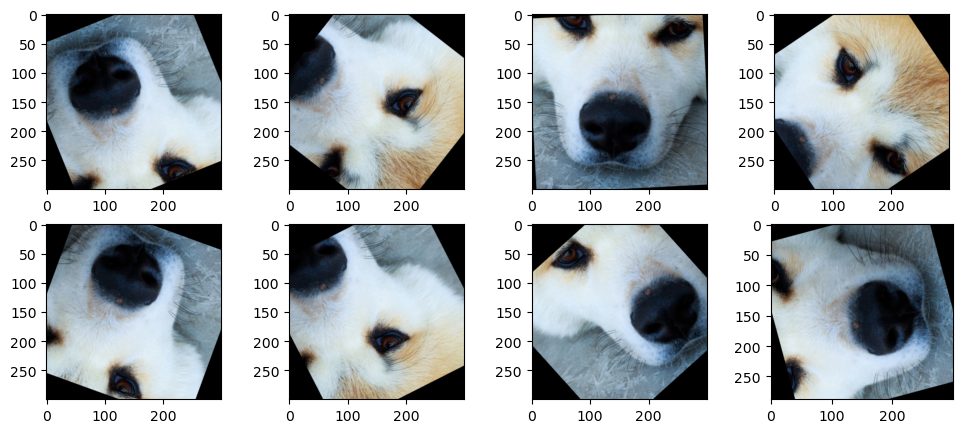

In [41]:
# 変数img3から300×300の画像をランダムな場所で切り出し、ランダムに回転させた画像を8枚作り、2行4列で表示しよう
# 画像の大きさはfigsize=(12,5)としましょう

img_h = img.shape[0]
img_w = img.shape[1]

plt.figure(figsize=(12,5))

for i in range(8):
    h = np.random.randint(0,img_h-300+1)
    w = np.random.randint(0,img_w-300+1)
    rot = np.random.randint(0, 361)
    tmp_img = img3[h:h+300,w:w+300,:]
    tmp = transform.rotate(tmp_img,angle=rot)
    
    plt.subplot(2,4,i+1)
    plt.imshow(tmp)

### フィルタリングをしてみよう
- まずはフィルタリングに関するライブラリをインポートしましょう
- 下記ライブラリをインポートしてください
    - from skimage import filters
    - from skimage import morphology as mor

In [42]:
from skimage import filters
from skimage import morphology as mor

### ノイズがある画像を読み込んでみましょう
- cat_noise_gray.pngは変数noz1に、cat_noise_color.pngは変数noz2に代入しましょう

In [43]:
noz1 = io.imread("cat_noise_gray.png")
noz2 = io.imread("cat_noise_color.png")

### 2列に並べて画像を表示してみましょう
- グレースケール画像を表示する時は、引数に`cmap="gray"`を追記します

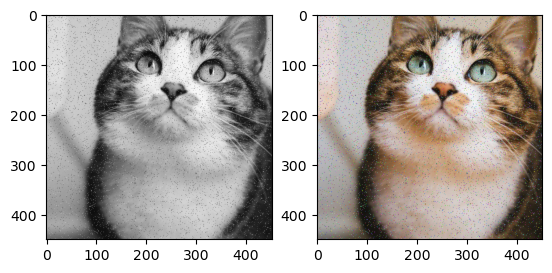

In [44]:
plt.subplot(1,2,1)
plt.imshow(noz1,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(noz2)

### 平均化フィルタをかけてみましょう
- グレースケール画像であるnoz1に平均化フィルタをかけ、結果を変数fil1に代入しましょう
- 平均化フィルタをする際には、filters.rank.mean関数を利用します
- 具体的には`filters.rank.mean(img,mor.square(3))`と記述します
- mor.square(3)はフィルタの形であり、3*3の正方形という意味となります

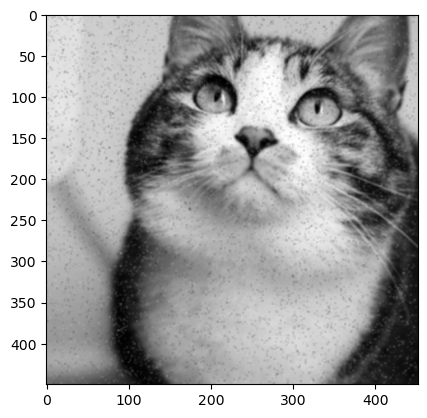

In [45]:
fil1 = filters.rank.mean(noz1,mor.square(3))
plt.imshow(fil1,cmap="gray")

- フィルタのサイズを7*7の正方形にして平均化フィルタをかけ、結果を変数fil2に代入しましょう

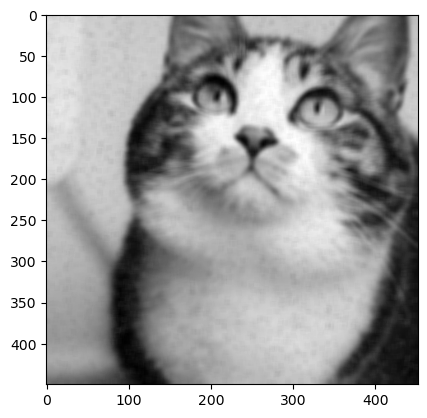

In [46]:
fil2 = filters.rank.mean(noz1,mor.square(7))
plt.imshow(fil2,cmap="gray")

### メディアンフィルタをかけてみましょう
- グレースケール画像であるnoz1にメディアンフィルタをかけ、結果を変数fil3に代入しましょう
- 平均化フィルタをする際には、filters.median関数を利用します
- 具体的には`filters.median(img,mor.square(3))`と記述します

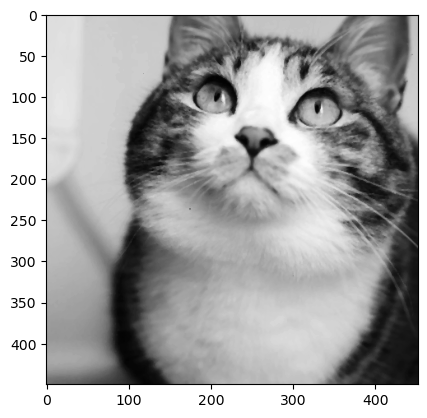

In [47]:
fil3 = filters.median(noz1,mor.square(3))
plt.imshow(fil3,cmap="gray")

### ソーベルフィルタをかけてみよう
- fil3にソーベルフィルタをかけ、結果を変数fil4に代入しましょう
- ソーベルフィルタをする際には、filters.sobel関数を利用します
- 具体的には`filters.sobel(img)`と記述します
- 結果を可視化する際には見やすいように、`cmap="gray_r"`としましょう

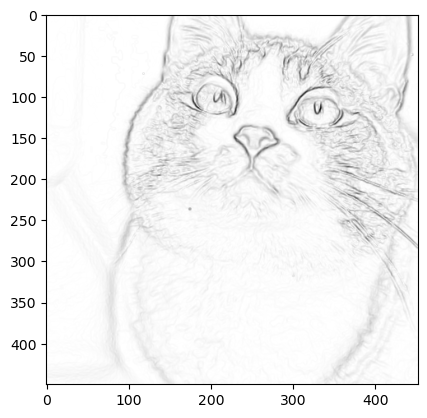

In [50]:
fil4 = filters.sobel(fil3)
plt.imshow(fil4, cmap="gray_r")